In [58]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np


In [59]:
image = io.imread('tiger1.jfif')

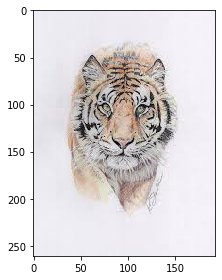

In [60]:
io.imshow(image)
io.show()

In [61]:
rows = image.shape[0]
cols = image.shape[1]

In [62]:
rows

261

In [63]:
cols 

193

In [64]:
image = image.reshape(image.shape[0]*image.shape[1],3)

In [65]:
image.shape

(50373, 3)

In [67]:
kmeans = KMeans(n_clusters = 36, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=36, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  

In [68]:
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  

In [69]:
clusters


array([[ 79,  72,  68],
       [230, 228, 233],
       [186, 171, 160],
       [136, 129, 126],
       [243, 240, 247],
       [200, 195, 193],
       [ 31,  25,  23],
       [170, 165, 163],
       [ 93,  87,  85],
       [207, 204, 203],
       [165, 143, 131],
       [211, 190, 175],
       [235, 233, 239],
       [195, 166, 146],
       [230, 221, 213],
       [140, 115, 100],
       [207, 178, 159],
       [ 50,  42,  37],
       [122, 116, 114],
       [191, 187, 185],
       [223, 211, 199],
       [159, 131, 114],
       [238, 236, 242],
       [159, 153, 151],
       [217, 213, 214],
       [ 12,   5,   4],
       [108, 102, 101],
       [224, 222, 227],
       [185, 150, 127],
       [218, 201, 186],
       [196, 182, 171],
       [147, 141, 139],
       [181, 177, 175],
       [177, 157, 146],
       [120,  96,  80],
       [ 66,  58,  53]], dtype=uint8)

In [43]:
labels = labels.reshape(rows,cols)

In [44]:
np.save('codebook_tiger.npy',clusters)    
io.imsave('compressed_tiger1.png',labels)

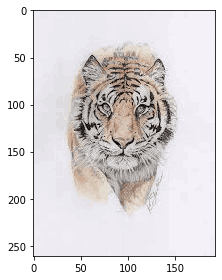

In [47]:
from skimage import io
import numpy as np
 
centers = np.load('codebook_tiger.npy')
c_image = io.imread('compressed_tiger1.png')
 
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]
io.imsave('reconstructed_tiger.png',image);
io.imshow(image)
io.show()